**TASKS TO DO**

1 - NEWS DATA

2 - DATA PREPROCESSING

3 - TRAINING AND TEST SPLIT

4 - LOGISTIC REGRESSION MODEL (for binary classification problem)

5 - EVALUTION ON TRAINED MODEL & NEWS PREDICTION

Import Dependencies

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
from sklearn.metrics import confusion_matrix
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
import joblib
import re
import string

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data Processing

In [9]:
#loading the fake and true data
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

In [10]:
fake.duplicated().sum()

np.int64(3)

In [11]:
true.duplicated().sum()

np.int64(206)

In [12]:
fake.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
fake.shape

(23478, 4)

In [13]:
true.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
true.shape

(21211, 4)

Checking the sum of missing values

In [14]:
true.isna().sum()

,0
title,0
text,0
subject,0
date,0


In [15]:
fake.isna().sum()

,0
title,0
text,0
subject,0
date,0


This shows that the datasets does not have any missing values, which is beneficial for analysis and modeling tasks as it ensures there are no gaps in the data that could potentially impact the results.

Assigning Class

In [16]:
true['class'] = 'True'
fake['class'] = 'Fake'

In [17]:
news_df = pd.concat([fake, true])

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to convert 'class' into numeric labels
news_df['class'] = label_encoder.fit_transform(news_df['class'])

# Display a sample to check the result
news_df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [18]:
# Printing value counts for the 'subject' column in the true news dataset
print("true news dataset:")
print(true['subject'].value_counts())

# Printing value counts for the 'subject' column in the fake news dataset
print("\nfake news dataset:")
print(fake['subject'].value_counts())

true news dataset:
subject
politicsNews    11220
worldnews        9991
Name: count, dtype: int64

fake news dataset:
subject
News               9050
politics           6838
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


# 3. Exploratory Data Analysis

*   This stage entails thoroughly exploring and comprehending the dataset prior to employing machine learning algorithms. It plays a crucial role in tasks such as data preprocessing, selecting appropriate models, and devising strategies for evaluating model performance.



##  Distribution of Subject Column

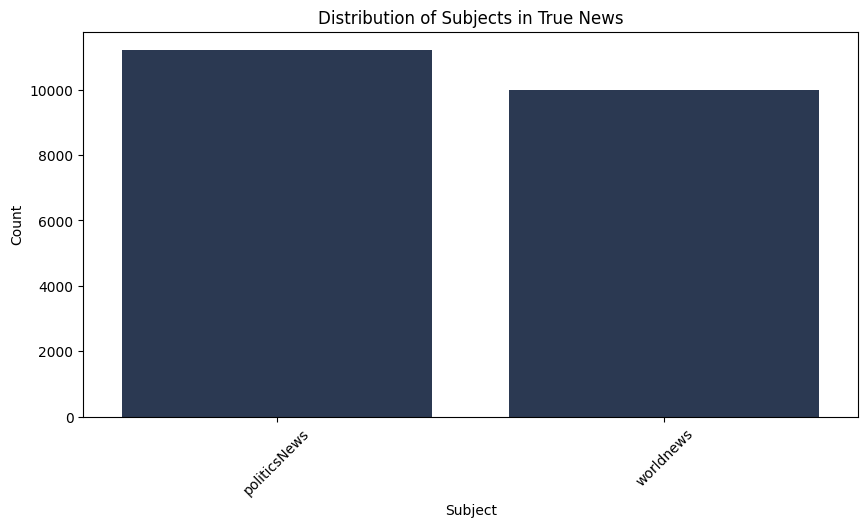

In [19]:
# Get the distribution of 'subject' in both datasets
true_subject_counts = true['subject'].value_counts()
fake_subject_counts = fake['subject'].value_counts()


# Plot the distribution for true news
plt.figure(figsize=(10, 5))
sns.barplot(x=true_subject_counts.index, y=true_subject_counts.values, color = '#253758')
plt.title('Distribution of Subjects in True News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

It shows the distribution of subjects in true news. The higher the count, the more news articles were about that subject.

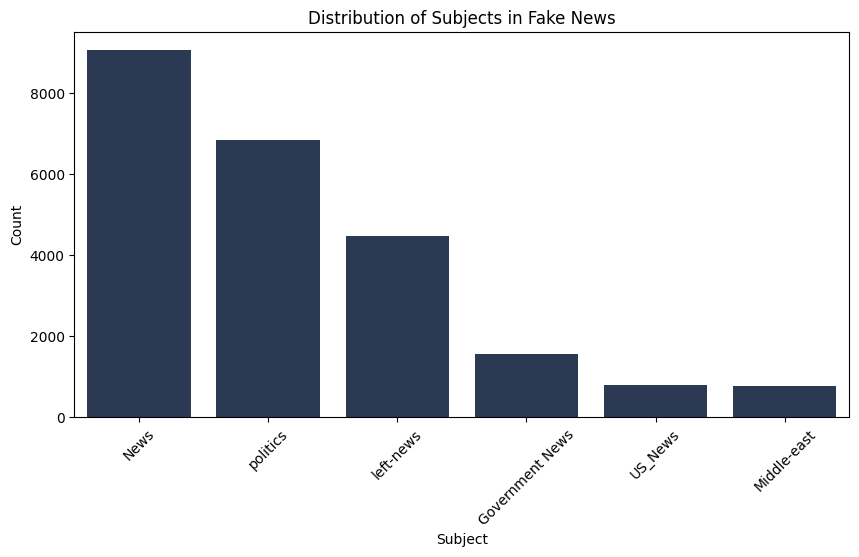

In [20]:
# Plot the distribution for fake news
plt.figure(figsize=(10, 5))
sns.barplot(x=fake_subject_counts.index, y=fake_subject_counts.values, color ='#253758')
plt.title('Distribution of Subjects in Fake News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

It shows the distribution of subjects in fake news by content. The content is divided into a number of different categories, including news, politics, and government. The most common subjects in fake news are news, politics, and government.

## Analysis of Article Length (Word Count)

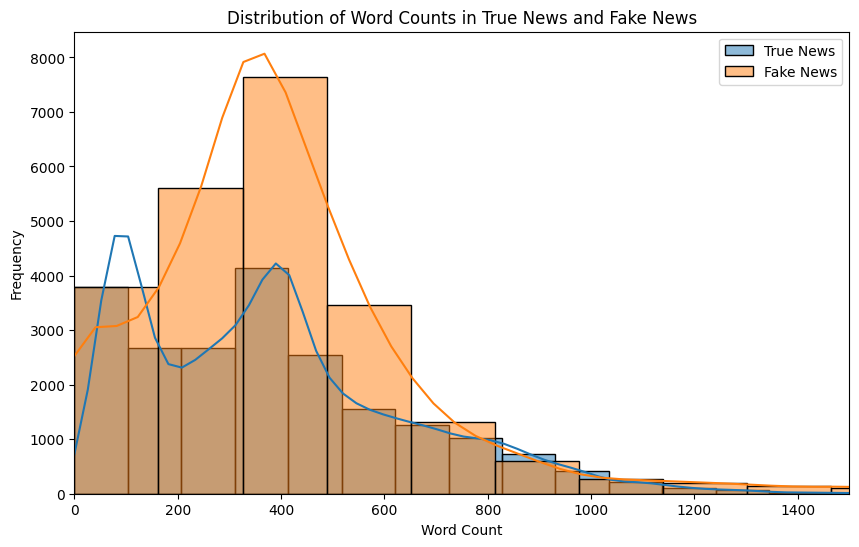

In [21]:
# Calculate word counts for both datasets
true['word_count'] = true['text'].apply(lambda x: len(x.split()))
fake['word_count'] = fake['text'].apply(lambda x: len(x.split()))

# Create a single plot with histograms for both datasets
plt.figure(figsize=(10, 6))
sns.histplot(true, x='word_count', kde='True', alpha=0.5, label='True News', bins=50)
sns.histplot(data=fake, x='word_count', kde='True', alpha=0.5, label='Fake News', bins=50)
plt.title('Distribution of Word Counts in True News and Fake News' )
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xlim(0, 1500)
plt.legend()
plt.show()

*   This aims to visually compare the distribution of word counts between true and fake news datasets.



### Investigate Relationships between Subject and Class

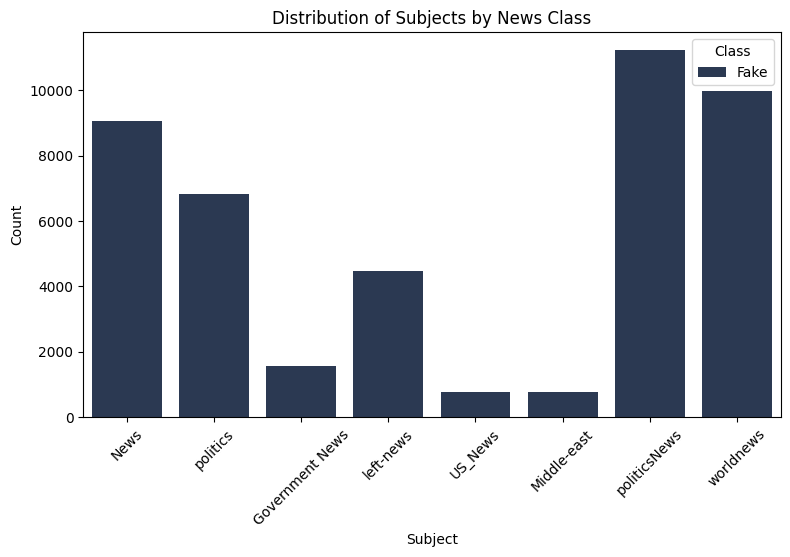

In [22]:
# Plot the relationship between 'subject' and 'class' using count plot
plt.figure(figsize=(9, 5))
sns.countplot(data=news_df, x='subject', color='#253758')
plt.title("Distribution of Subjects by News Class")
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class', labels=['Fake', 'True'])
plt.show()

There were more news stories about politics than any other subject. Politics news stories are broken down further into subcategories, such as Government News, World News, and US News.

## Checking for Class Imbalance

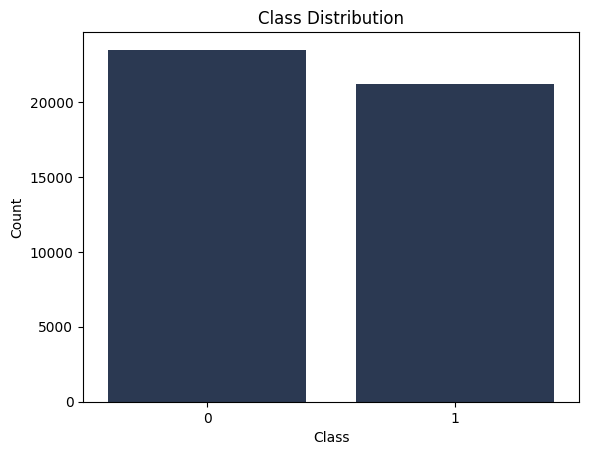

In [23]:
# Check the count of each class
class_distribution = news_df['class'].value_counts()

# Plot the distribution to visualize any imbalance
sns.countplot(news_df, x='class', color='#253758')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

*   The distribution between the two classes is approximately even.


# 4. Text Preprocessing
Text processing helps to prepare the text data for further analysis or modeling by cleaning it and reducing each word to its base form through stemming or lemmatization.

In [24]:
# Setup for stopwords, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def remove_punctuation(text):
    text = unicodedata.normalize('NFKD', text)
    extra_punctuation = '“”‘’—–'
    punctuation = string.punctuation + extra_punctuation
    translator = str.maketrans('', '', punctuation)
    return text.translate(translator)

def preprocess_text(text):
    text = text.lower()
    text = remove_punctuation(text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

In [25]:
# Apply the preprocess_text function to your DataFrame columns
true['text'] = true['text'].apply(preprocess_text)
fake['text'] = fake['text'].apply(preprocess_text)

# Visualization: Word Clouds

Text(0.5, 1.0, 'Word Cloud for True News')

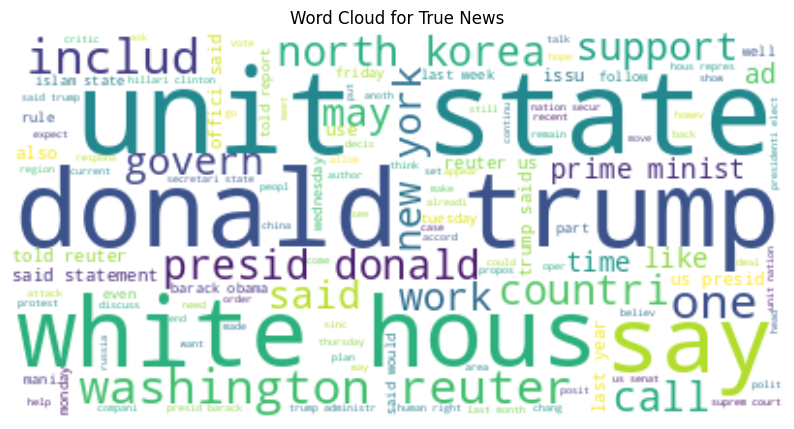

In [27]:
# Tokenize and remove stop words for true news
true_tokens = [word for text in true['text'] for word in text.split() if word not in stop_words]

# Tokenize and remove stop words for fake news
fake_tokens = [word for text in fake['text'] for word in text.split() if word not in stop_words]

# Create a word cloud for true news
wordcloud_true = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(true_tokens))

# Create a word cloud for fake news
wordcloud_fake = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(fake_tokens))

# Plot word clouds
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for True News')

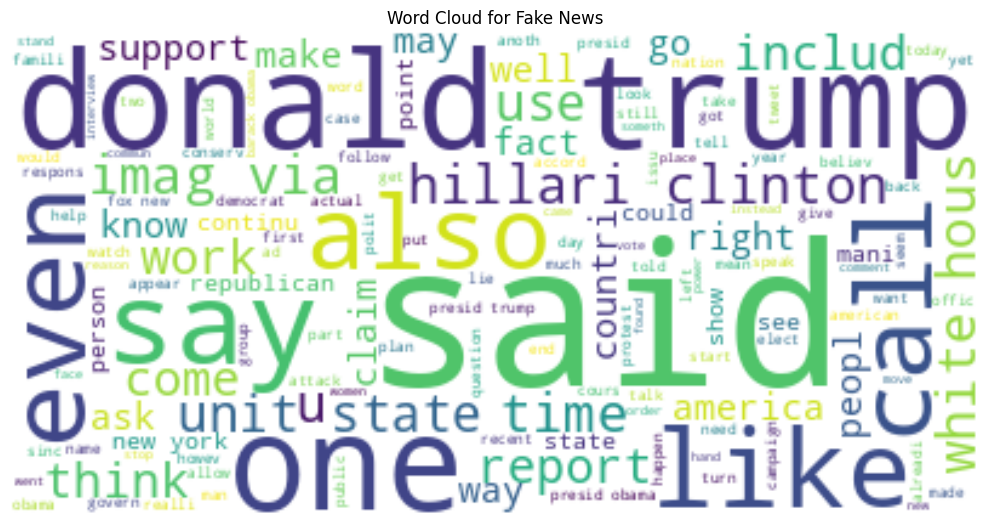

In [28]:
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')

plt.tight_layout()
plt.show()

Most Common Words in True News And Fake News

In [29]:
# Create word frequency counters
true_word_count = Counter(true_tokens)
fake_word_count = Counter(fake_tokens)

# Most common words in each dataset
most_common_true = true_word_count.most_common(10)
most_common_fake = fake_word_count.most_common(10)

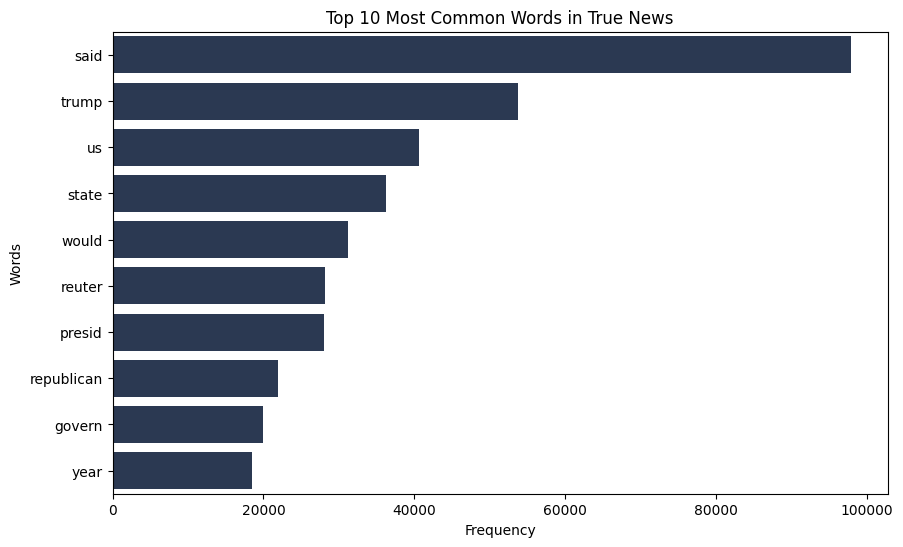

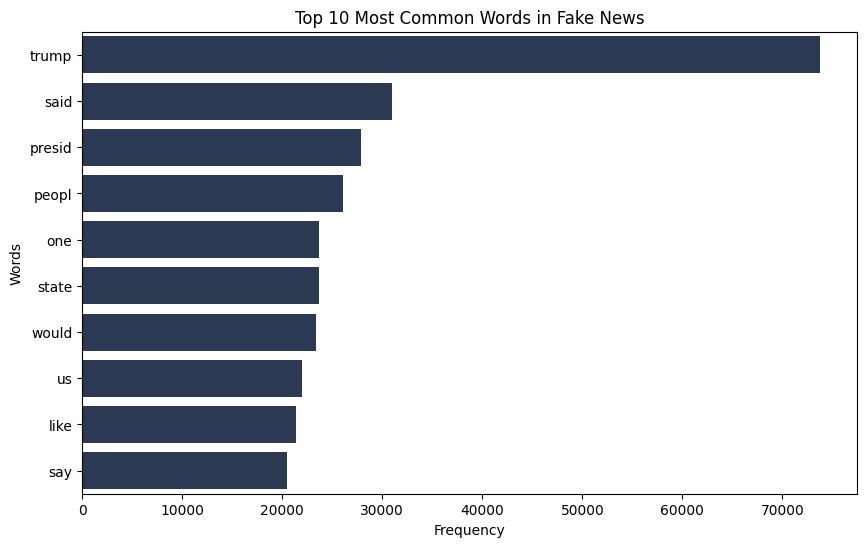

In [30]:
# Create bar plots for the most common words in true news
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in most_common_true[:10]], y=[x[0] for x in most_common_true[:10]], color='#253758')
plt.title('Top 10 Most Common Words in True News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Create bar plots for the most common words in fake news
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in most_common_fake[:10]], y=[x[0] for x in most_common_fake[:10]], color='#253758')
plt.title('Top 10 Most Common Words in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

*   This indicates some of the most common words in both datasets are related to politics and Donald Trump.

# 5. Modeling

Model Training

In [31]:
vectorizer = CountVectorizer()
X_real = vectorizer.fit_transform(true['text'])
X_fake = vectorizer.transform(fake['text'])
X = sp.vstack([X_real, X_fake])
y = np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Logistic Regression

In [33]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [34]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9953009621839337


*   These metrics suggest that the baseline model (logistic regression model) is performing exceptionally well in identifying fake news.

# Long Short Term Memory Networks (LSTM)

In [35]:
# Define maximum vocabulary size and sequence length
vocab_size = 5000
max_len = 100

# Instantiate tokenizer and fit on text data (both real and fake)
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(np.concatenate([true['text'], fake['text']]))

# Convert text data to sequences
X_real_seq = tokenizer.texts_to_sequences(true['text'])
X_fake_seq = tokenizer.texts_to_sequences(fake['text'])

# Pad sequences to ensure they have the same length
X_real_seq = pad_sequences(X_real_seq, maxlen=max_len)
X_fake_seq = pad_sequences(X_fake_seq, maxlen=max_len)

# Concatenate the sequences and create target labels
X_seq = np.concatenate([X_real_seq, X_fake_seq])
y_seq = np.concatenate([np.ones(len(X_real_seq)), np.zeros(len(X_fake_seq))])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [36]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9205 - loss: 0.1969 - val_accuracy: 0.9799 - val_loss: 0.0580
Epoch 2/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9869 - loss: 0.0426 - val_accuracy: 0.9791 - val_loss: 0.0608
Epoch 3/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9942 - loss: 0.0212 - val_accuracy: 0.9815 - val_loss: 0.0589
Epoch 4/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9893 - loss: 0.0307 - val_accuracy: 0.9813 - val_loss: 0.0561
Epoch 5/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9970 - loss: 0.0110 - val_accuracy: 0.9836 - val_loss: 0.0669


In [37]:
# Evaluate model on test set
test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9862 - loss: 0.0576
Test accuracy: [0.06693397462368011, 0.9835533499717712]


The model achieved high accuracy during training and testing, indicating strong performance in detecting fake news. The training accuracy reached 99%, suggesting a near-perfect fit, while the test accuracy was approximately 98.13%. These results suggest that the model is effective in distinguishing between real and fake news.

Tuning LSTM (additional LSTM layer)

In [38]:
num_epochs = 10
batch_size = 16
learning_rate = 0.001
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 256),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with a custom learning rate and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=batch_size)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Epoch 1/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - accuracy: 0.9286 - loss: 0.1904 - val_accuracy: 0.9723 - val_loss: 0.0806
Epoch 2/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.9825 - loss: 0.0567 - val_accuracy: 0.9809 - val_loss: 0.0584
Epoch 3/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 46s 15ms/step - accuracy: 0.9905 - loss: 0.0312 - val_accuracy: 0.9814 - val_loss: 0.0561
Epoch 4/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.9944 - loss: 0.0182 - val_accuracy: 0.9817 - val_loss: 0.0614
Epoch 5/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.9966 - loss: 0.0122 - val_accuracy: 0.9833 - val_loss: 0.0615
Epoch 6/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9976 - loss: 0.0085 - val_accuracy: 0.9852 - val_loss: 0.0574
Epoch 7/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.9976 - loss: 0.0083 - val_accuracy: 0.9834 - val_loss: 0.0719
Epoch 8/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.9982 -

The model achieved a test accuracy of 98.46% with a test loss of 0.088 after 10 epochs, indicating strong performance in classifying real and fake news. These results suggest effective learning, though consistent test loss across epochs implies potential room for improvement.

## Model Evaluation

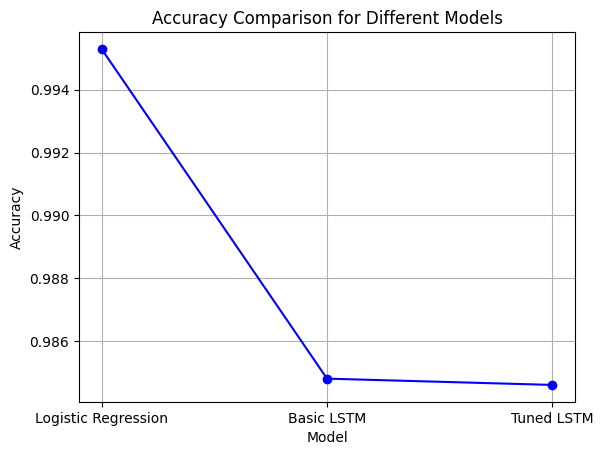

In [39]:
model_names = ['Logistic Regression', 'Basic LSTM', 'Tuned LSTM']
accuracies = [0.9953, 0.9848, 0.9846]

# Create a line plot
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Models')
plt.grid(True)
plt.show()

Logistic Regression: Accuracy: 99.53% (highest among the three models).

LSTM: Accuracy: 98.48% (second highest).

Tuned LSTM: Accuracy: 98.46% (slightly lower than Basic LSTM).

Logistic Regression performed the best in terms of accuracy.

Basic LSTM and Tuned LSTM showed comparable results with slight variations.

Results suggest that traditional models like Logistic Regression can be more accurate than deep learning models in some cases.

## Minimum Viable Product

Logistic Regression, with a 99.53% accuracy rate, stands out as the best model for fake news detection among the evaluated models. Its high accuracy allows for precise identification and flagging of fake news, reducing false positives and negatives. By analyzing text-based features, Logistic Regression can quickly and effectively classify news articles as real or fake, making it a reliable choice for combating misinformation in real-time scenarios. This accuracy ensures robust content filtering and helps maintain information integrity.

How Logistic Regression Helps Media Companies Combat Fake News -:


*   High Accuracy (99.53%): Ensures reliable identification of fake news, reducing errors in detection.

*   Minimizes False Positives/Negatives: Helps avoid mislabeling and missing critical misinformation.


*   Supports Real-time Detection: Crucial for rapid response in social media environments.

*   Enhances Media Reputation: Accurate detection helps build public trust in media organizations.


*   Reduces Legal/Reputational Risks: Limits the spread of misinformation, avoiding legal issues and reputational damage.

*   Contributes to a Well-informed Society: Accurate news delivery supports informed public discourse.

## Saving the Model

In [40]:
# Save the trained logistic regression model
joblib.dump(LogisticRegression, 'logistic_regression_model.pkl')

# Save the CountVectorizer
joblib.dump(vectorizer, 'CountVectorizer.pkl')

['CountVectorizer.pkl']